In [3]:
import numpy as np
import qiskit.quantum_info as qi
# Qiskit imports:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city


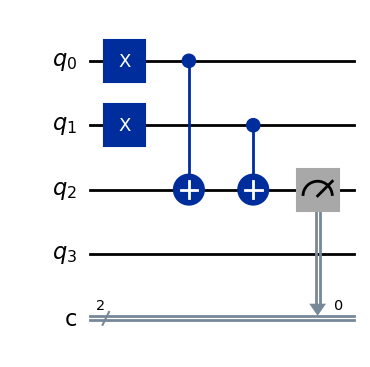

In [4]:
qc = QuantumCircuit(4,2) #4 qubits with 2 classical bits
# encode inputs in qubits 0 and 1
qc.x(0) #flips 1st qubit to 1
qc.x(1) #flips 2nd qubit to 1 to perform the addition 1+1
# use cnots to determine if qubits 0 and 1 are the same
# and put result on qubit 2
qc.cx(0,2)
qc.cx(1,2)
# extract output
qc.measure(2,0) # extract rightmost bit
qc.draw(output='mpl')

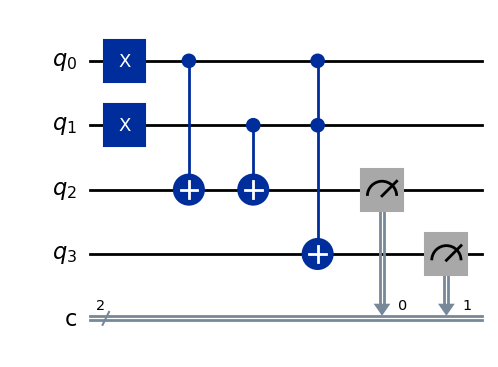

In [5]:
qc = QuantumCircuit(4,2) #4 qubits with 2 classical bits
# encode inputs in qubits 0 and 1
qc.x(0) #flips 1st qubit to 1
qc.x(1) #flips 2nd qubit to 1 to perform the addition 1+1
# use cnots to determine if qubits 0 and 1 are the same
# and put result on qubit 2
qc.cx(0,2)
qc.cx(1,2)
# use ccx to write the AND of the input qubits on qubit 3
qc.ccx(0,1,3)
# extract output
qc.measure(2,0) # extract rightmost bit
qc.measure(3,1) # extract AND value set by ccx gate
qc.draw(output='mpl')

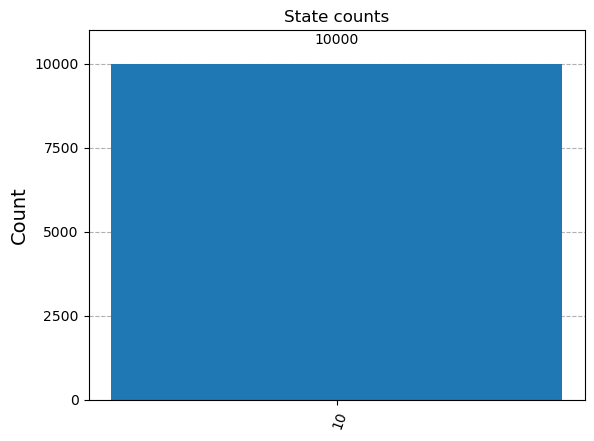

In [6]:
# Transpile for simulator
simulator = AerSimulator()
qc = transpile(qc, simulator)
# Run and get counts in a histogram
result = simulator.run(qc, shots=10000).result()
counts = result.get_counts(qc)
plot_histogram(counts, title='State counts')

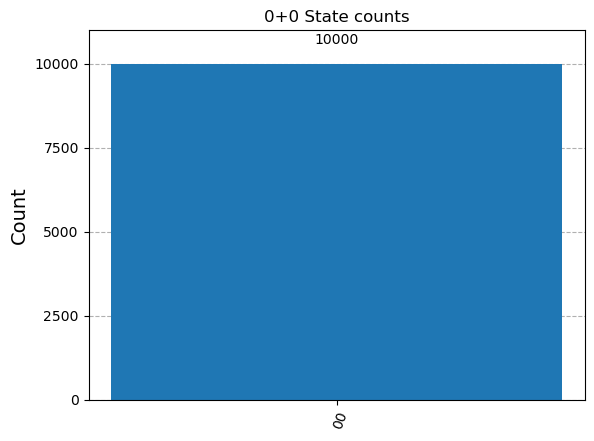

In [7]:
# Question 1, Part 1: Change the input qubits to demonstrate that you can add any two bits, not just 1+1. 
# (For 0+0)
qc = QuantumCircuit(4,2)
# No X gates needed for 0+0 (qubits start in |0⟩ state)
qc.cx(0,2)
qc.cx(1,2)
qc.ccx(0,1,3)
qc.measure(2,0)
qc.measure(3,1)

simulator = AerSimulator()
qc = transpile(qc, simulator)
result = simulator.run(qc, shots=10000).result()
counts = result.get_counts(qc)
plot_histogram(counts, title='0+0 State counts')

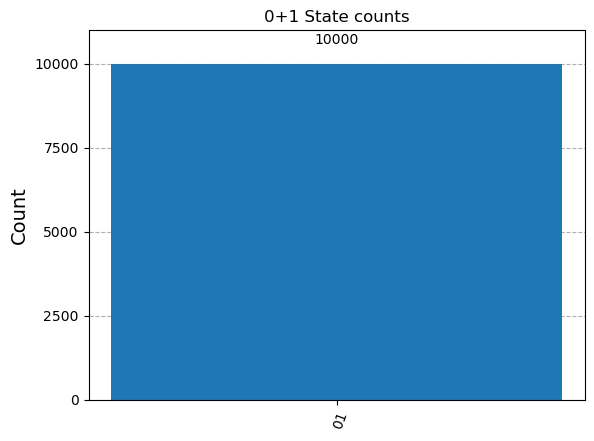

In [8]:
#For 0+1
qc = QuantumCircuit(4,2)
qc.x(1)  # Only flip the second qubit to 1
qc.cx(0,2)
qc.cx(1,2)
qc.ccx(0,1,3)
qc.measure(2,0)
qc.measure(3,1)

simulator = AerSimulator()
qc = transpile(qc, simulator)
result = simulator.run(qc, shots=10000).result()
counts = result.get_counts(qc)
plot_histogram(counts, title='0+1 State counts')

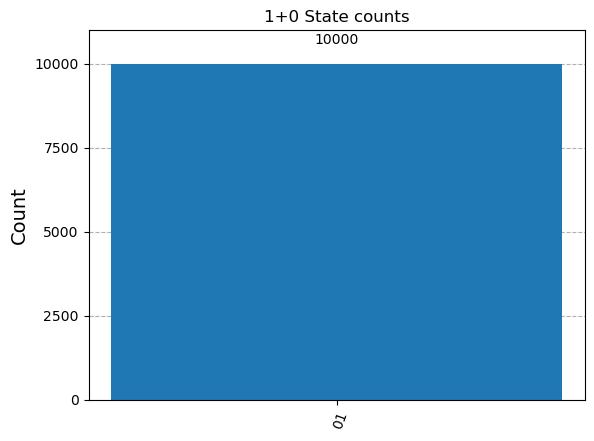

In [9]:
# For 1 + 0
qc = QuantumCircuit(4,2)
qc.x(0)  # Only flip the first qubit to 1
qc.cx(0,2)
qc.cx(1,2)
qc.ccx(0,1,3)
qc.measure(2,0)
qc.measure(3,1)

simulator = AerSimulator()
qc = transpile(qc, simulator)
result = simulator.run(qc, shots=10000).result()
counts = result.get_counts(qc)
plot_histogram(counts, title='1+0 State counts')

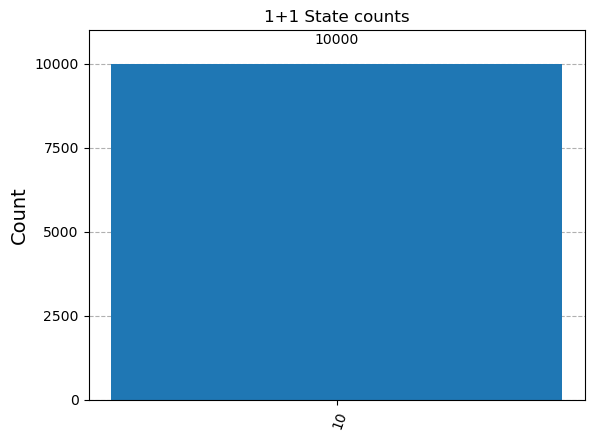

In [10]:
#For 1+1(we did this above but I thought i'll do it anyways, for showing all the bits)
qc = QuantumCircuit(4,2)
qc.x(0)  # Flip both qubits to 1
qc.x(1)
qc.cx(0,2)
qc.cx(1,2)
qc.ccx(0,1,3)
qc.measure(2,0)
qc.measure(3,1)

simulator = AerSimulator()
qc = transpile(qc, simulator)
result = simulator.run(qc, shots=10000).result()
counts = result.get_counts(qc)
plot_histogram(counts, title='1+1 State counts')

In [ ]:
#Question 1 Part 2: What happens if you change the input qubits to a superposition state by replacing the two X-gates
# in the example above with Hadamard gate? Explain the result.

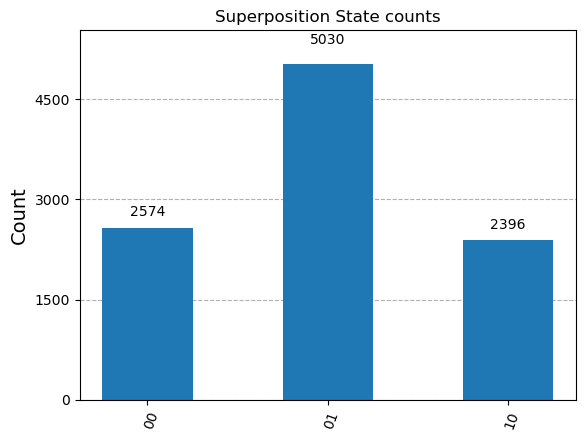

In [11]:
qc = QuantumCircuit(4,2)
qc.h(0)  # Put both qubits in superposition
qc.h(1)
qc.cx(0,2)
qc.cx(1,2)
qc.ccx(0,1,3)
qc.measure(2,0)
qc.measure(3,1)

simulator = AerSimulator()
qc = transpile(qc, simulator)
result = simulator.run(qc, shots=10000).result()
counts = result.get_counts(qc)
plot_histogram(counts, title='Superposition State counts')

In [ ]:
# When I change the input qubits to a superposition state by replacing the two X-gates with Hadamard gates, 
# I notice that for all possible outcomes: '00', '01', '10', we see a distribution of 25.74%, 50.30%, 23.96%, respectively. 
# The reason for this is that the Hadamard gates place qubits 0 and 1 in an equal superposition of |0⟩ and |1⟩.
# When we measure, we're effectively sampling from all possible input combinations with equal probability. 
# This creates a quantum superposition of all possible addition results, with the probability 
# distribution reflecting the classical probabilities of each result.

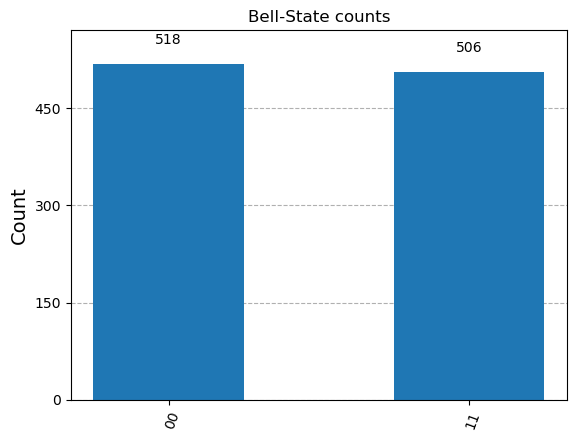

In [12]:
# Create circuit
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.measure_all()

# Transpile for simulator
simulator = AerSimulator()
circ = transpile(circ, simulator)

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts')

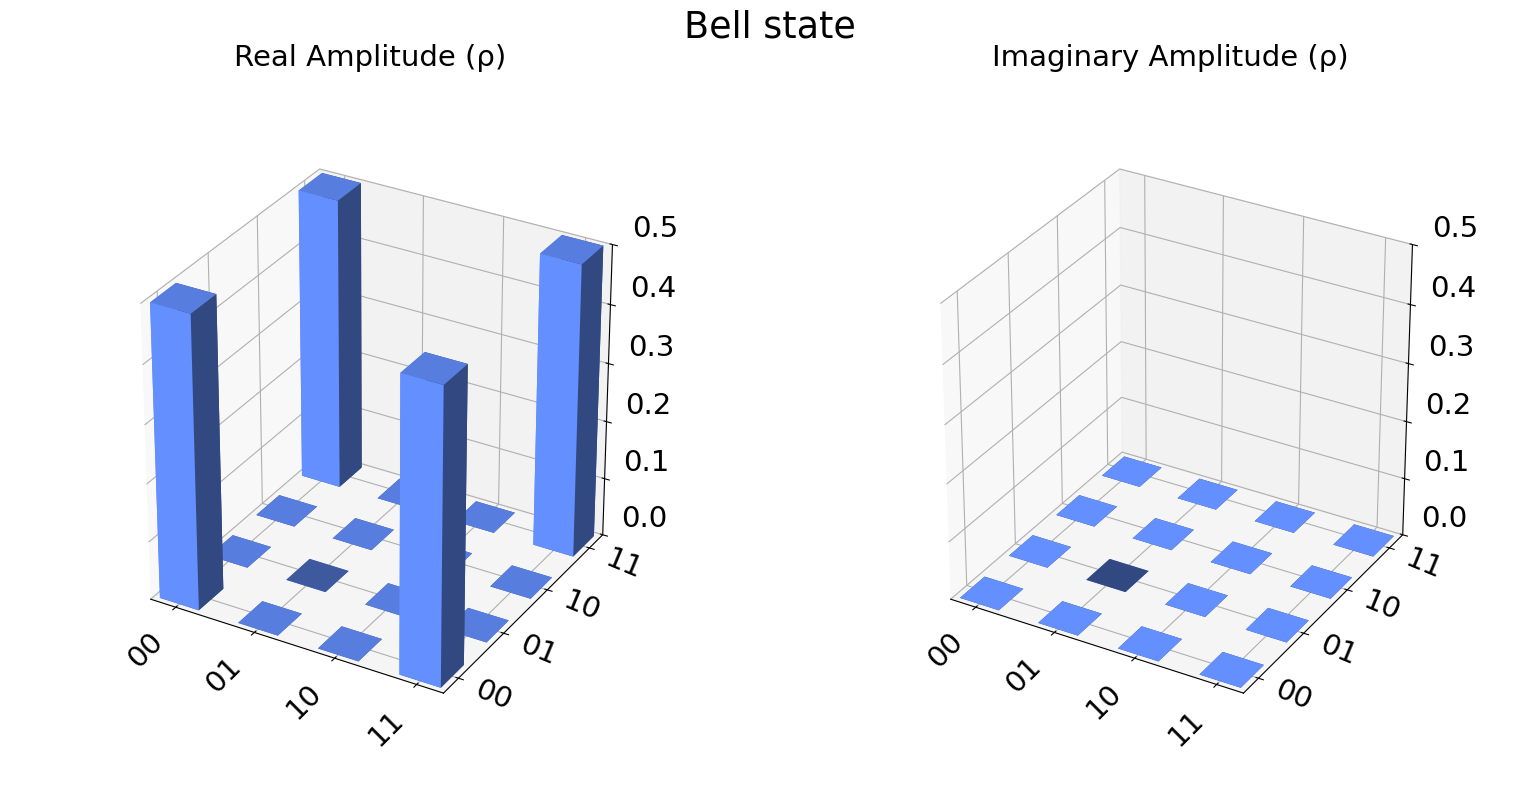

In [13]:
# Construct quantum circuit without measure
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.save_statevector() #let’s save the final state

# Transpile for simulator
simulator = AerSimulator()
circ = transpile(circ, simulator)

# Run and get statevector
result = simulator.run(circ).result()

# Extract the final statevector
statevector = result.get_statevector(circ)

# Plot the density matrix
plot_state_city(statevector, title='Bell state')

In [ ]:
#Question 2

Tr(ρ²) for Bell state |β₀₀⟩: (1+0j)


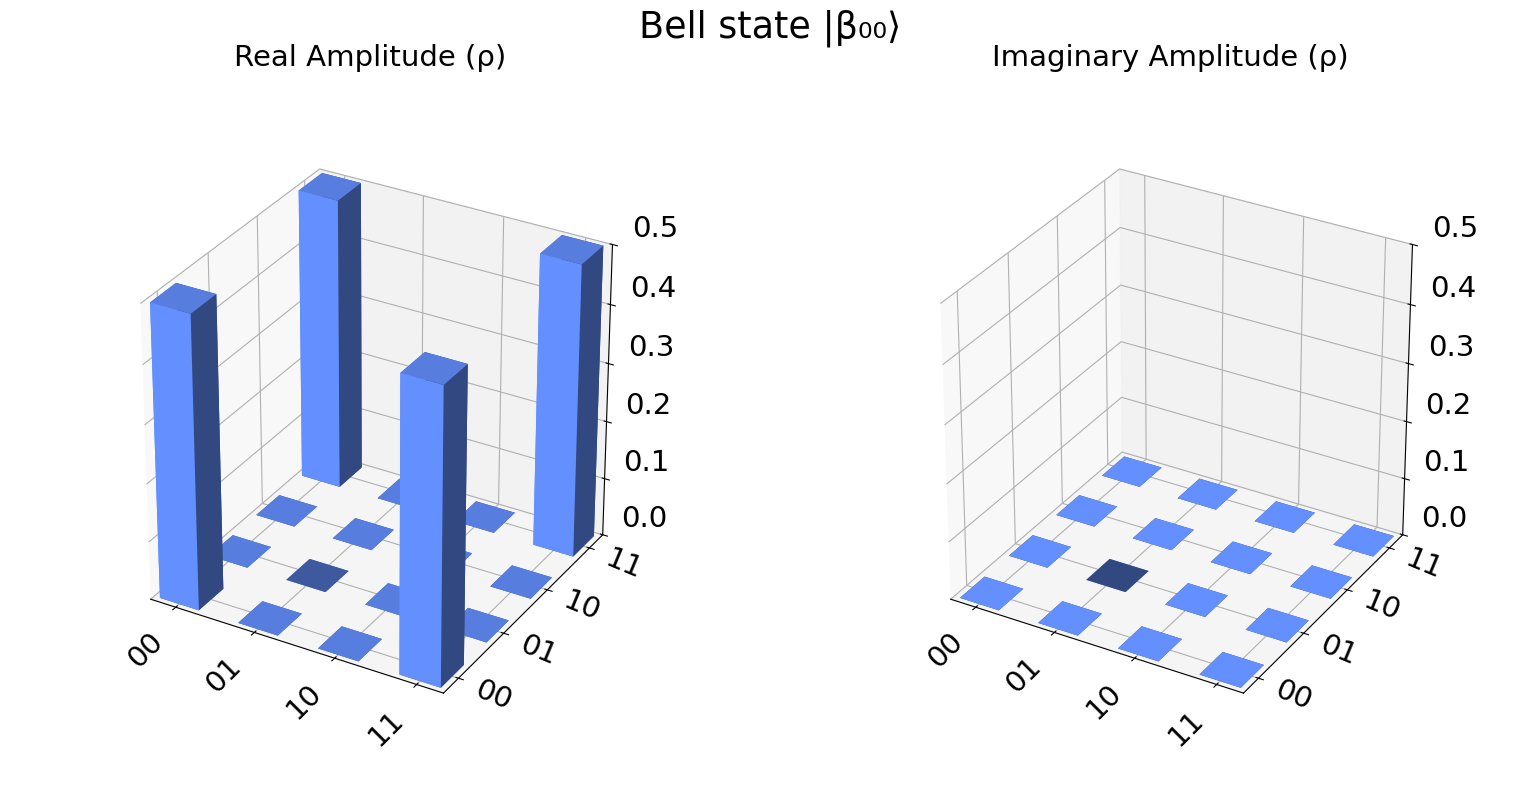

In [14]:
# Bell state |β₀₀⟩ = (1/√2)|00⟩ + (1/√2)|11⟩
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.save_statevector()

simulator = AerSimulator()
circ = transpile(circ, simulator)
result = simulator.run(circ).result()
statevector = result.get_statevector(circ)

# Convert statevector to density matrix
from qiskit.quantum_info import DensityMatrix
rho = DensityMatrix(statevector)

# Calculate Tr(ρ²)
# We can use rho.purity() which calculates Tr(ρ²)
purity = rho.purity()
print(f"Tr(ρ²) for Bell state |β₀₀⟩: {purity}")

# Plot the density matrix
plot_state_city(rho, title='Bell state |β₀₀⟩')

In [15]:
# Bell state |β₀₁⟩ = (1/√2)|00⟩ - (1/√2)|11⟩
circ01 = QuantumCircuit(2)
circ01.h(0)
circ01.cx(0, 1)
circ01.z(1)  # Phase flip on the second qubit
circ01.save_statevector()

# Bell state |β₁₀⟩ = (1/√2)|01⟩ + (1/√2)|10⟩
circ10 = QuantumCircuit(2)
circ10.h(0)
circ10.cx(0, 1)
circ10.x(1)  # Bit flip on the second qubit
circ10.save_statevector()

# Bell state |β₁₁⟩ = (1/√2)|01⟩ - (1/√2)|10⟩
circ11 = QuantumCircuit(2)
circ11.h(0)
circ11.cx(0, 1)
circ11.z(1)  # Phase flip
circ11.x(1)  # Bit flip on the second qubit
circ11.save_statevector()

In [16]:
# Process and analyze each Bell state
bell_circuits = [circ01, circ10, circ11]
bell_names = ["|β₀₁⟩", "|β₁₀⟩", "|β₁₁⟩"]

for i, circuit in enumerate(bell_circuits):
    simulator = AerSimulator()
    transpiled_circ = transpile(circuit, simulator)
    result = simulator.run(transpiled_circ).result()
    statevector = result.get_statevector(transpiled_circ)
    
    # Create density matrix
    rho = DensityMatrix(statevector)
    purity = rho.purity()
    print(f"Tr(ρ²) for Bell state {bell_names[i]}: {purity}")
    
    # Plot the density matrix
    plot_state_city(rho, title=f'Bell state {bell_names[i]}')
    
    # Check for off-diagonal elements (indicating entanglement)
    print(f"Density matrix for {bell_names[i]}:")
    print(rho)

Tr(ρ²) for Bell state |β₀₁⟩: (1+0j)
Density matrix for |β₀₁⟩:
DensityMatrix([[ 0.5+0.j,  0. +0.j,  0. -0.j, -0.5-0.j],
               [ 0. +0.j,  0. +0.j,  0. -0.j,  0. -0.j],
               [ 0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j],
               [-0.5+0.j,  0. +0.j,  0. +0.j,  0.5+0.j]],
              dims=(2, 2))
Tr(ρ²) for Bell state |β₁₀⟩: (1+0j)
Density matrix for |β₁₀⟩:
DensityMatrix([[0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0. +0.j, 0.5+0.j, 0.5+0.j, 0. +0.j],
               [0. +0.j, 0.5+0.j, 0.5+0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j]],
              dims=(2, 2))
Tr(ρ²) for Bell state |β₁₁⟩: (1+0j)
Density matrix for |β₁₁⟩:
DensityMatrix([[ 1.87469973e-33+0.j, -3.06161700e-17-0.j,
                 3.06161700e-17+0.j,  1.87469973e-33+0.j],
               [-3.06161700e-17+0.j,  5.00000000e-01+0.j,
                -5.00000000e-01+0.j, -3.06161700e-17+0.j],
               [ 3.06161700e-17+0.j, -5.00000000e-01-0.j,
                 5.0000000

In [ ]:
# For entanglement, we need to look at the off-diagonal elements.
# In the density matrix representation, non-zero off-diagonal elements (like ρ₀₁, ρ₀₃, ρ₁₀, ρ₃₀) indicate entanglement. 
# All Bell states show these characteristics as they are maximally entangled states.

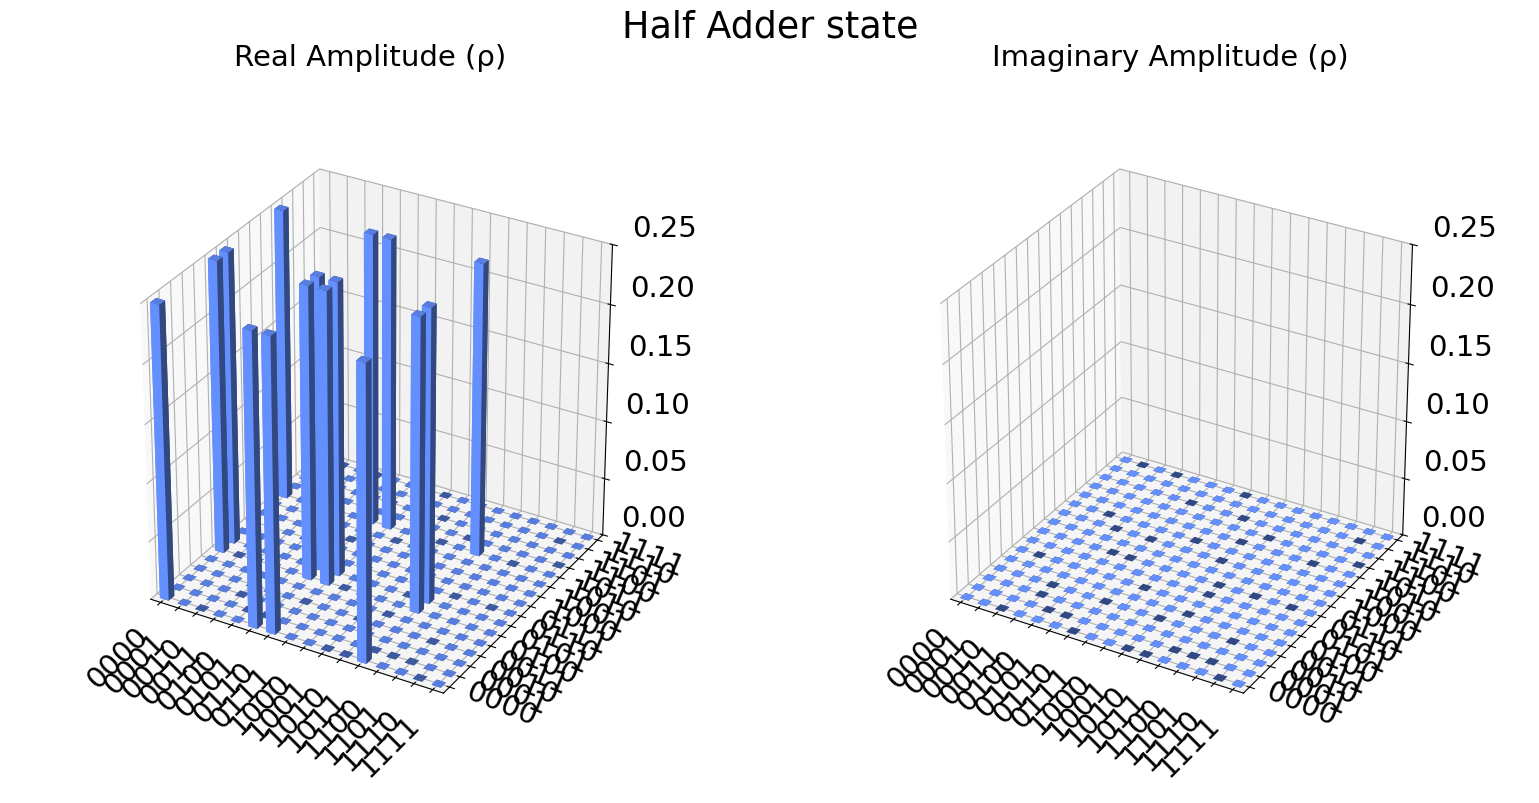

In [20]:
qc = QuantumCircuit(4,2)

# encode inputs in qubits 0 and 1
qc.h(0)
qc.h(1)

# use cnots to write the XOR of the inputs on qubit 2
qc.cx(0,2)
qc.cx(1,2)

# use ccx to write the AND of the inputs on qubit 3
qc.ccx(0,1,3)

# don’t measure anything, just save the statevector
qc.save_statevector()

# Transpile for simulator
simulator = AerSimulator()
qc = transpile(qc, simulator)

# Run and get counts in a histogram
result = simulator.run(qc).result()
statevector = result.get_statevector(qc)
plot_state_city(statevector, title='Half Adder state')

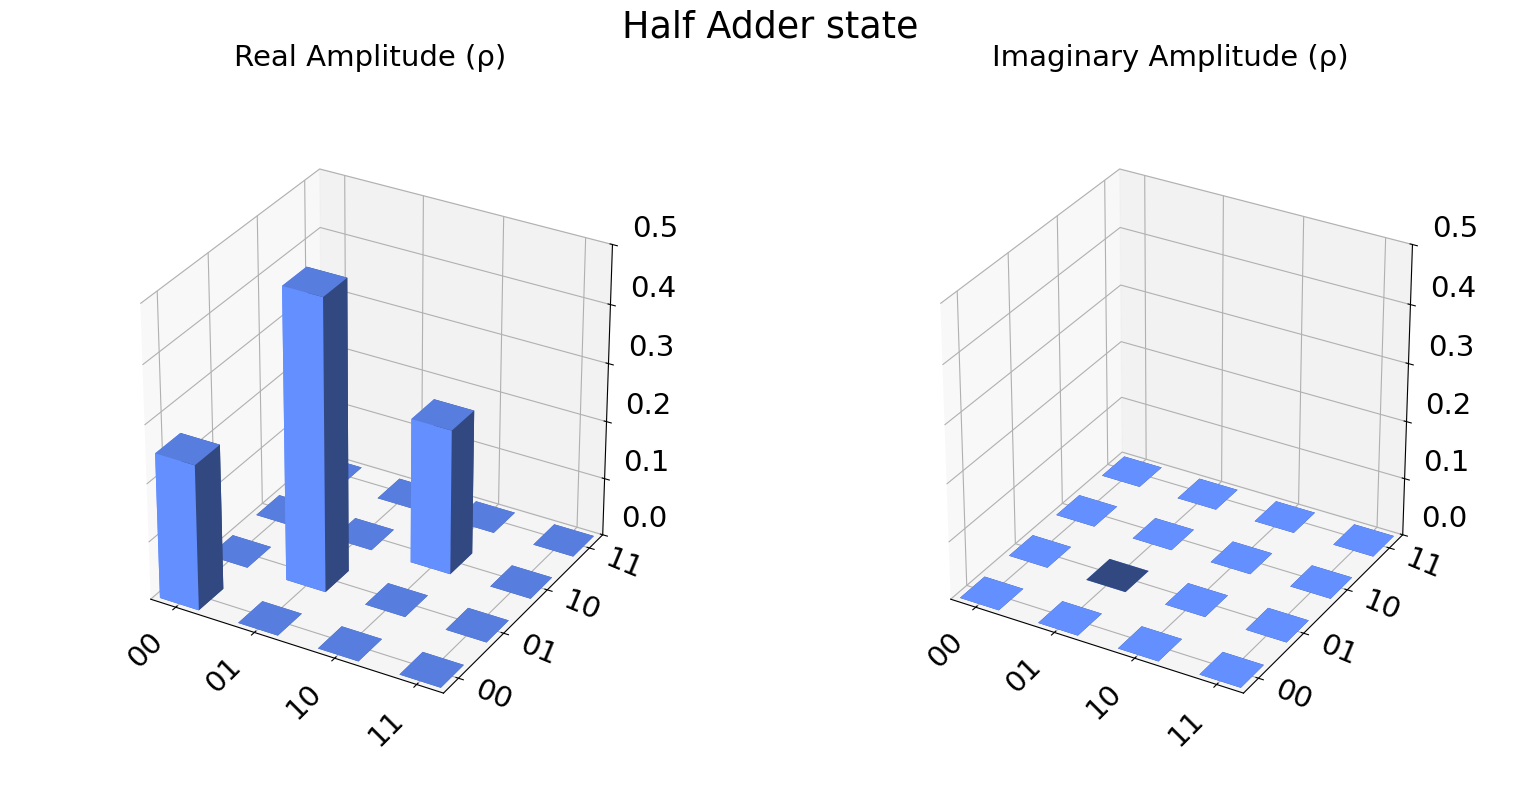

In [23]:
from qiskit.quantum_info import DensityMatrix, partial_trace
qc = QuantumCircuit(4,2)

# encode inputs in qubits 0 and 1
qc.h(0)
qc.h(1)

# use cnots to write the XOR of the inputs on qubit 2
qc.cx(0,2)
qc.cx(1,2)

# use ccx to write the AND of the inputs on qubit 3
qc.ccx(0,1,3)
qc.save_statevector()

# Transpile for simulator
simulator = AerSimulator()
qc = transpile(qc, simulator)

# Run and get counts in a histogram
result = simulator.run(qc).result()
statevector = result.get_statevector(qc)

# Use partial trace to get the reduced density matrix
# for qubit 2 and 3
partial_density_matrix = partial_trace(statevector, [0, 1])
plot_state_city(partial_density_matrix, title='Half Adder state')

In [ ]:
#Question 3

In [24]:
# Calculate Tr(ρ²) for the reduced density matrix
purity = partial_density_matrix.purity()
print(f"Tr(ρ²) for reduced density matrix: {purity}")

# Print the reduced density matrix to examine its elements
print("Reduced density matrix:")
print(partial_density_matrix)

Tr(ρ²) for reduced density matrix: (0.375+0j)
Reduced density matrix:
DensityMatrix([[0.25+0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j],
               [0.  +0.j, 0.5 +0.j, 0.  +0.j, 0.  +0.j],
               [0.  +0.j, 0.  +0.j, 0.25+0.j, 0.  +0.j],
               [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j]],
              dims=(2, 2))


In [25]:
# Is the reduced density matrix consistent with the count histogram from Question 1?
# Yes, the diagonal elements of the reduced density matrix (0.25, 0.5, 0.25, 0) match exactly with the probabilities we expected from the histogram in Question 1:
#
# Approx. 25% probability of '00' (when both input qubits are |0⟩)
# Approx. 50% probability of '01' (when input qubits are |0⟩|1⟩ or |1⟩|0⟩)
# Approx. 25% probability of '10' (when both input qubits are |1⟩)

In [ ]:
# Is this a pure or mixed state?
# It is a mixed state because Tr(ρ²) = 0.375, which is less than 1.
# For a pure state, Tr(ρ²) would equal exactly 1. 
# This makes sense because we traced out qubits 0 and 1, which were entangled with qubits 2 and 3.

In [ ]:
# Is the state entangled?

# From the observation of the reduced density matrix,there are no significant off-diagonal elements between the state spaces of qubits 2 and 3. 
# All off-diagonal elements are 0, which suggests that qubits 2 and 3 are not entangled with each other. This is because:
# Qubit 2 represents the XOR of inputs
# Qubit 3 represents the AND of inputs
# While both depend on the same input qubits, they don't have direct interaction with each other
# Therefore, the state of qubits 2 and 3 can be represented as a separable state (not entangled).